In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.9.1-cp38-cp38-win_amd64.whl (444.1 MB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [2]:
import pickle

In [4]:
# from zipfile import ZipFile
# with ZipFile('/content/drive/MyDrive/capstone/archive.zip', 'r') as zip:
#     zip.extractall()
#     print('Done!')

Done!


In [3]:
train_dir='C:/Users/Sinegalatha/Desktop/Imarticus Learning/GLAUCOMA/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
test_dir='C:/Users/Sinegalatha/Desktop/Imarticus Learning/GLAUCOMA/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [4]:
img_height,img_width=300,300
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 520 files belonging to 2 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 2 classes.


In [8]:
classnames=train_ds.class_names
print(classnames)

['Glaucoma_Negative', 'Glaucoma_Positive']


In [9]:
pickle_out = open("train_ds","wb")
pickle.dump(classnames, pickle_out)
pickle_out.close()

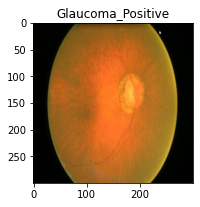

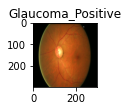

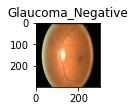

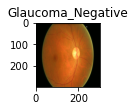

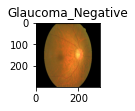

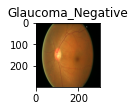

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.show()

In [8]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(300,300,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [9]:
resnet_model.add(Flatten())
resnet_model.add(Dense(1000, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1000)              2049000   
                                                                 
 dense_1 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,051,002
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


C:\Users\Sinegalatha\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 132s 7s/step - loss: 0.9646 - accuracy: 0.6981 - val_loss: 0.7104 - val_accuracy: 0.6769
Epoch 2/5
17/17 [==============================] - 103s 6s/step - loss: 0.4689 - accuracy: 0.7788 - val_loss: 0.6177 - val_accuracy: 0.7308
Epoch 3/5
17/17 [==============================] - 112s 6s/step - loss: 0.5128 - accuracy: 0.7558 - val_loss: 0.6535 - val_accuracy: 0.7231
Epoch 4/5
17/17 [==============================] - 110s 6s/step - loss: 0.4141 - accuracy: 0.8135 - val_loss: 0.6864 - val_accuracy: 0.6692
Epoch 5/5
17/17 [==============================] - 116s 7s/step - loss: 0.4064 - accuracy: 0.7827 - val_loss: 0.7252 - val_accuracy: 0.6692


In [13]:
resnet_model.save("my_model_glucoma")

INFO:tensorflow:Assets written to: my_model_glucoma\assets


INFO:tensorflow:Assets written to: my_model_glucoma\assets


In [14]:
reconstructed_model = keras.models.load_model("my_model_glucoma")

In [16]:
import cv2
bad=cv2.imread('C:/Users/Sinegalatha/Desktop/Imarticus Learning/GLAUCOMA/test negative good retina/d2.jpg')
bad_resized= cv2.resize(bad, (img_height,img_width))
bad=np.expand_dims(bad_resized,axis=0)

In [19]:
pred=resnet_model.predict(bad)
print(pred)
output_class=classnames[np.argmax(pred)]
print("The predicted class is", output_class)
pred_save=reconstructed_model.predict(bad)
print(pred_save)
output_class=classnames[np.argmax(pred_save)]
print("The predicted class is", output_class)

1/1 [==============================] - 1s 531ms/step
[[0.46859482 0.53140515]]
The predicted class is Glaucoma_Positive
1/1 [==============================] - 10s 10s/step
[[0.46859482 0.53140515]]
The predicted class is Glaucoma_Positive


In [23]:
import cv2
good=cv2.imread('C:/Users/Sinegalatha/Desktop/Imarticus Learning/GLAUCOMA/test positive bad retina/bad2.jpg')
good_resized= cv2.resize(good, (img_height,img_width))
good=np.expand_dims(good_resized,axis=0)

In [25]:
pred=resnet_model.predict(good)
print(pred)
output_class=classnames[np.argmax(pred)]
print("The predicted class is", output_class)
pred_save=reconstructed_model.predict(good)
print(pred_save)
output_class=classnames[np.argmax(pred_save)]
print("The predicted class is", output_class)

1/1 [==============================] - 1s 516ms/step
[[0.04339366 0.9566063 ]]
The predicted class is Glaucoma_Positive
1/1 [==============================] - 0s 385ms/step
[[0.04339366 0.9566063 ]]
The predicted class is Glaucoma_Positive


In [ ]:
import cv2
import matplotlib.pyplot as mtp
image=cv2.imread('/content/good.jpg')
mtp.imshow(image)